In [153]:
import numpy as np
from typing import List
import matplotlib.pyplot as plt

from scipy.fft import fftn, fft

# 0. Custom Parameters

In [180]:
# 1. 键长文件 -- `data.txt`
txt_path = "/data/home/liuhanyu/hyliu/pwmat_demo/xhm/data.txt"

# 2. AIMD 时长 -- unit: fs
tot_time = 1000

# 3. 步数
num_steps = 42001

# 4. 时间lst
times_lst = np.linspace(0, tot_time, num_steps)
interval = times_lst[1] - times_lst[0]

# 5. 
freq_min = 1.4  # 横坐标最小值
freq_max = 1.8  # 横坐标最大值
mag_min = 0     # 纵坐标最小值
mag_max = 5   # 纵坐标最大值

# 1. 读取 txt 文件

In [155]:
data = np.loadtxt(txt_path)
data = data.reshape(-1, 2).T
data[0]     # Step
data[1]     # Avg bond
data.shape

(2, 42001)

# 2. 获取横纵坐标

In [156]:
times_lst

array([0.00000000e+00, 2.38095238e-02, 4.76190476e-02, ...,
       9.99952381e+02, 9.99976190e+02, 1.00000000e+03])

# 3. 绘制平均键长

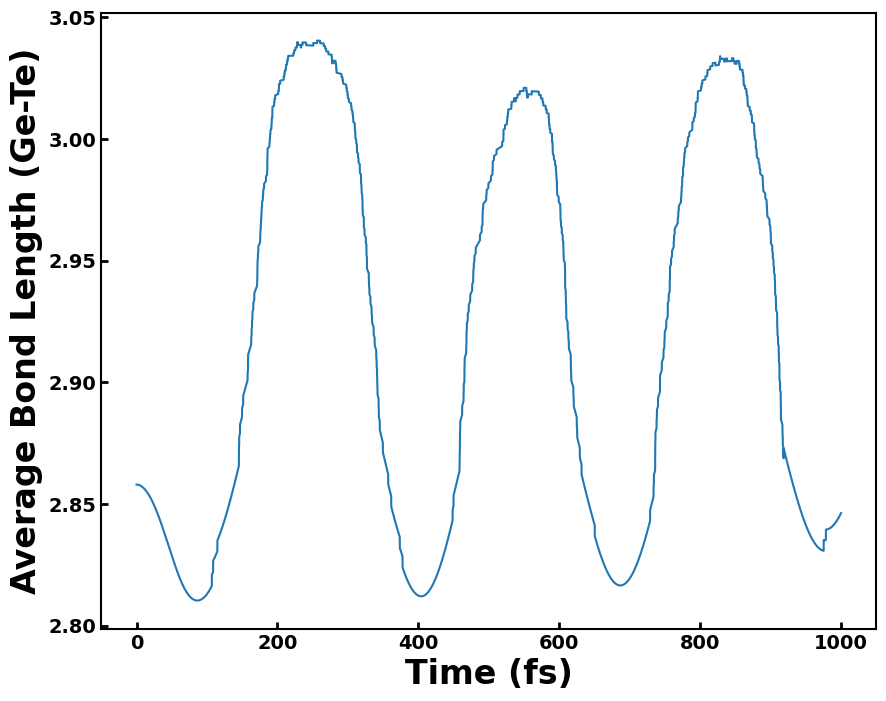

In [157]:
def plot_time(times_lst:List[float], frame_avg_bonds_lst:List[float]):
    plt.figure(figsize=(10, 8))
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    # 1. xlabel / ylabel
    plt.xlabel("Time (fs)",
               fontsize=24,
               fontweight="bold")
    plt.ylabel("Average Bond Length (Ge-Te)",
               fontsize=24,
               fontweight="bold")
    # 2. xticks / yticks
    ax = plt.gca()
    plt.xticks(fontsize=14, 
        fontweight="bold"
        )
    plt.yticks(fontsize=14, 
        fontweight="bold"
        )
    # 3. 刻度线的粗细
    plt.tick_params(
        width=2,        # 刻度线的粗细
        length=5,       # 刻度线的长短
        #labelsize=28   # 刻度线的字体大小
        )
    # 4. 设置坐标轴的粗细
    ax = plt.gca()
    ax.spines['bottom'].set_linewidth(1.5);###设置底部坐标轴的粗细
    ax.spines['left'].set_linewidth(1.5);####设置左边坐标轴的粗细
    ax.spines['right'].set_linewidth(1.5);###设置右边坐标轴的粗细
    ax.spines['top'].set_linewidth(1.5);###设置右边坐标轴的粗细
    
    plt.plot(times_lst, frame_avg_bonds_lst)
    plt.show()


plot_time(times_lst, data[1])

# 4. FFT

In [158]:
# 1. Perform the FFT on avgBond using the fft function
fft_results = fft(data[1])
# 2. Calculate the magnitudes of the FFT coefficients:
magnitudes = np.abs(fft_results)
sampling_rate = 1 / ((times_lst[1] - times_lst[0]) * 10E-15)  # Assuming the data is sampled at 1 unit per sample
frequencies = np.fft.fftfreq(len(fft_results), d=1/sampling_rate)
frequencies_thz = frequencies / 10E12

In [159]:
frequencies_thz

array([ 0.        ,  0.00999976,  0.01999952, ..., -0.02999929,
       -0.01999952, -0.00999976])

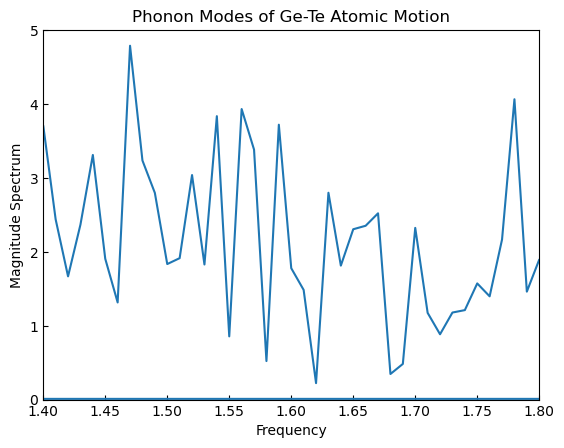

In [181]:
plt.plot(frequencies_thz, magnitudes)
plt.xlim(freq_min, freq_max)
plt.ylim(mag_min, mag_max)
plt.xlabel('Frequency')
plt.ylabel('Magnitude Spectrum')
plt.title('Phonon Modes of Ge-Te Atomic Motion')
plt.show()

In [161]:
fft_results.shape, magnitudes.shape
bondfft = np.vstack([frequencies_thz, magnitudes])
bondfft = bondfft.T
bondfft

array([[ 0.00000000e+00,  1.22598749e+05],
       [ 9.99976191e-03,  3.46857561e+02],
       [ 1.99995238e-02,  9.52467943e+02],
       ...,
       [-2.99992857e-02,  1.92120025e+03],
       [-1.99995238e-02,  9.52467943e+02],
       [-9.99976191e-03,  3.46857561e+02]])

In [162]:
np.savetxt(
        fname="/data/home/liuhanyu/hyliu/pwmat_demo/xhm/bondfft.txt",
        X=bondfft)